# Plotting with Matplotlib
## Introduction

Most certainly you are familiar with the frase "A pictures is worth a thousand words". Good graphics are tremendously helpful in visualizing, understanding and analyzing data. Matplotlib is the standard plotting tool in Python. As the name hints, it was developped with MATLAB's plotting syntax in mind and people familiar with MATLAB will recognize the many similarities. 

This notebook aims at providing a basic introduction to Matplotlib, its syntax and how it is applied to data. As before, examples will lead the way. 

Important side note: Matplotlib is introduced as it is still understood as the backbone of plotting in Python. However, it must be said that Matplotlib has quite a few shortcomings. This has caused programmers to create seperate plotting packages that make good on the deficiencies of Matplotlib. An excellent overview can be found in [here](https://www.youtube.com/watch?v=0g2Zb2xVeCU). Yet all these well intended efforts by different programmers have caused somewhat of an atomization of plotting packages. Nowadays, the many packages & functions cause quite some confusion among Python programmers, especially for people new to programming. Which package should I use for my task? My advise is this: get going with Matplotlib. Then check the following alternatives to Matplotlib:
* [Seaborn](http://seaborn.pydata.org/index.html)
* [Altair](https://altair-viz.github.io/gallery/index.html#bar-charts)
* [Bokeh](http://bokeh.pydata.org/en/latest/docs/gallery.html)
* [Plotly](https://plot.ly/python/)

## Imports
Convention is to `import matplotlib.pyplot as plt`. Some people prefer to load `pylab` as it imports NumPy into its namespace and thus saves the user from a second import line. However, polluting your namespace makes it more difficult for others to understand your code and thus it is recommended to follow convention of separately importing `matplotlib.pyplot` and `numpy`. 

## Styles
Matplotlib's standard style is aesthetically not all that pleasing and looks old-fashioned in the context of today's data visualization context. The developing community of Matplotlib addressed this by introducing custom styles. In this notebook we will be using the 'seaborn-whitegrid' style. For an overview of available styles see [Matplotlib's documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

##  Display Plots
If you are running Python within Jupyter notebooks, you should add `%matplotlib inline` and end your plot commands with a semicolon (;). If you wish to make use of matplotlib's interactive features like zooming and panning you might consider using `%matplotlib notebook` instead. In case you run your Python code from a IDE/script, be sure to add `plt.show()` at the very end of your script.

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Matplotlib's Two Interfaces

What might be confusing to some is that matplotlib is built to handle two different plotting interfaces: one which follows the MATLAB-style and a more powerful object-oriented interface. Two examples will show the differences.

### MATLAB-Style Interface

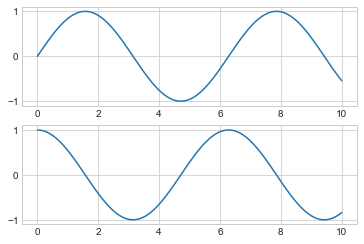

In [2]:
# x-axis range
x = np.linspace(0, 10, 100)

# Create first of two panels
plt.subplot(2,1,1)  # (row, col, panel no.)
plt.plot(x, np.sin(x))

# Create second of two panels
plt.subplot(2,1,2)
plt.plot(x, np.cos(x));

In order to change the figure and axes you could use the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) routines. 


### Object-Oriented Interface
And here's the same plot using this style of plotting:

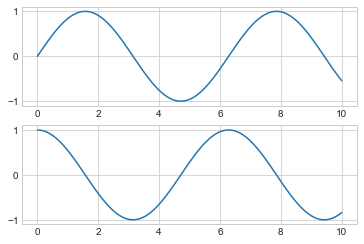

In [3]:
# Create grid of plots
# ax will be array of two Axes objects
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In the object-oriented style you directly work on the `figure` and `axes` objects. Sometimes, if you are asked to draw complicated figures, this approach might be advisable as it provides easier control over the `figure` and `axes` objects. But in general, these two interface styles provide the same functionalities - the differences are of technical nature. Chosing one approach over the other boils down to preference. 

In this notebook we will primarily use the MATLAB style but you should be aware of both, especially when searching the web for an answer to a specific question you are facing in plotting a figure.

## Line Plots
### Simple Plot

The most basic plot is the visualization of some function $f(x)$. For simplicity and as a toy example, let the function be the periodic $\sin(x)$. We wish to plot $f(x)$ for interval $x \in [0, 10]$.

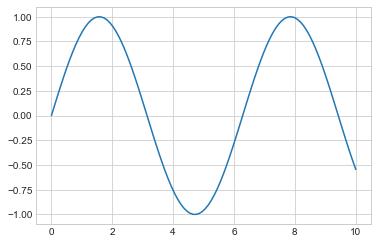

In [4]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x));

If we wish to add a second function to the plot, e.g. the cosine function, we can call the plot function multiple times.

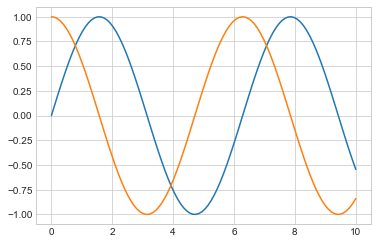

In [5]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Line Colors and Styles

The `plt.plot()` function takes additional arguments which can be used to adjust the plot style. The `color` keyword takes a string argument and can be specified in a variety of ways:
* Specify color by name (red, green, blue, cyan, magenta, yellow, black; [see here](https://matplotlib.org/examples/color/named_colors.html))
* Short color code (r, g, b, c, m, y, k)
* Grayscale between 0 and 1
* Hex code (RRGGBB from 00 to FF)
* RGB tuple, values $\in [0, 1]$
* all HTML color names ([see here](https://www.w3schools.com/colors/colors_names.asp))

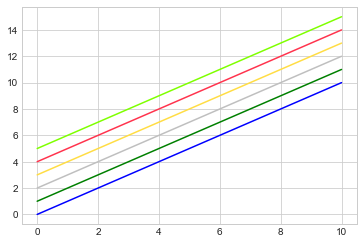

In [6]:
plt.plot(x, x + 0, color='blue')
plt.plot(x, x + 1, color='g')
plt.plot(x, x + 2, color='0.75')
plt.plot(x, x + 3, color='#FFDD44')
plt.plot(x, x + 4, color=(1.0,0.2,0.3))
plt.plot(x, x + 5, color='chartreuse');

Matplotlib will automatically cycle through a set of default colors if no color is specified. By defining a plot style such as `plt.style.use('seaborn-whitegrid')` the default colors are taken from the 'seaborn-whitegrid'-style file.

To adjust the linestyle, specify the respective style either with the code or the string. Available are: 

| **Code**      | **keyword**         |
|:-------------:|---------------------|
| '-'           | 'solid' *(default)* |
| '--'          | 'dashed'            |
| '-.'          | 'dashdot'           |
| ':'           | 'dotted'            |

If you wish to keep your code concise you can combine the linestyle code with the color in a single string.

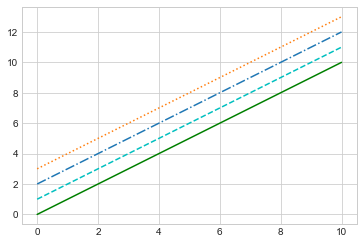

In [7]:
plt.plot(x, x + 0, '-g')   # solid green
plt.plot(x, x + 1, '--c')  # dashed cyan
plt.plot(x, x + 2, linestyle='-.')  # dashdot
plt.plot(x, x + 3, ls='dotted');  # dotted red

There are many more arguments to further adjust your plot to your liking. A toy example is given below, where the linewidth is manually set and circled markers are added (`marker='o'`). Regarding available markers a limited overview is shown in section 'Scatterplots' below. The full list of available markers [can be found here](https://matplotlib.org/stable/api/markers_api.html). For a furhter description on adjustable properties [see the Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). 

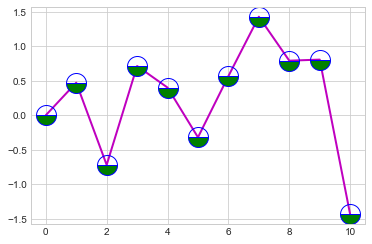

In [8]:
# Random walk data
np.random.seed(1234)
y = np.hstack([0, np.random.standard_normal(10).cumsum()])
x = range(len(y))

plt.plot(x, y, color='m', linewidth=2.0, 
         marker='o', markeredgecolor='b', markersize=20,
         markerfacecolor='g', fillstyle='bottom');

### Axes, Grids and Labels

Per default, matplotlib sets the axis based on the plotted data. However, sometimes it is desirable to have better control of the axis and not let matplotlib's default settings rule the axis. Adjusting axis limits is done with `plt.xlim()` and `plt.ylim()` methods. The two input values to these methods will set limits to the axis. Alternatively, the `plt.axis()` method allows for further control. For example `plt.axis('tight')` will automatically tighten the bounds around the current plot (which is sometimes desireable when you want to use your plot in a report/article).

By setting the style to `plt.style.use('seaborn-whitegrid')` each plot automatically adds a grid. Python's default style does not come with a grid. In case you wish to add/adjust a grid to the default style, you do this with the `plt.grid()` method. Details on the valid arguments for the `plt.grid()` [can be found here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html).

Title, axis and labels are added with `plt.xlabel()`, `plt.ylabel()`, `plt.title()`. 

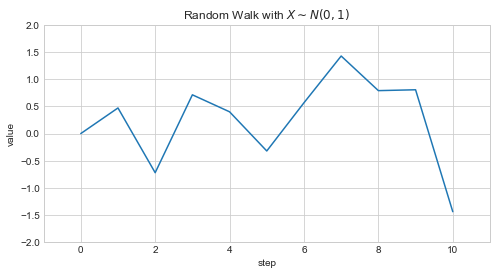

In [9]:
plt.figure(figsize=(8, 4))  # Adjusting figure size (width, height)
plt.plot(x, y)
plt.title("Random Walk with $X \sim N(0, 1)$")
plt.xlabel('step')
plt.ylabel('value')
plt.xlim(-1, 11)
plt.ylim(-2, 2);

### Plot a Legend
Adding a legend helps a visualization. Simple legends are added with the `plt.legend()` command, which will automatically place the legend where it fits best. If you wish to manually specify the location of the legend, you can use the argument `loc='string'` where `'string'` is a location like 'upper right', 'upper left', 'bottom left', 'bottom right' ([see here for all options](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)).

Other available options are: 
* Turning on/off the frame of the legend is done with `frameon=True / frameon=False`. 
* `ncol=n` specifies the number of columns in the legend (with `n` and integer). 
* `framealpha=n` changes the transparency of the frame (with `n` $\in [0, 1]$)


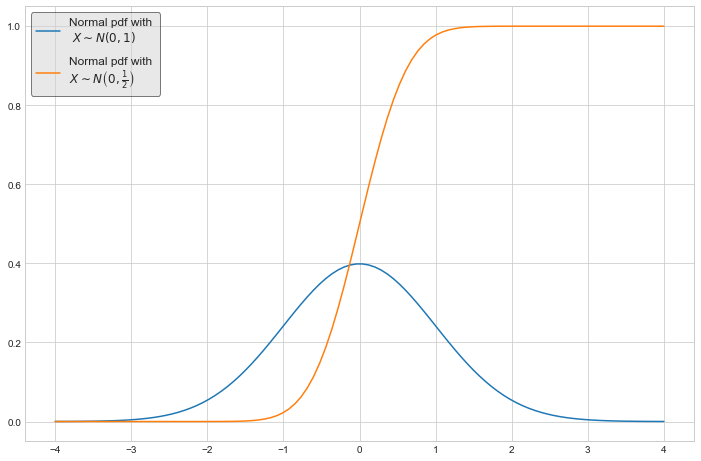

In [10]:
# Import needed for generating normal probability density function (pdf) data
import scipy.stats as sps

# Create data for the two normal pdf & cdf
x = np.linspace(-4, 4, 100)
y1 = sps.norm.pdf(x)
y2 = sps.norm.cdf(x, scale=0.5)

# Plot data including (TeX) label
plt.figure(figsize=(12, 8))
plt.plot(x, y1, label='Normal pdf with \n $X \sim N(0, 1)$')
plt.plot(x, y2, label='Normal pdf with' + '\n' +
                      r'$X \sim N\left(0, \frac{1}{2}\right)$')
plt.legend(loc='upper left', frameon=True, framealpha=0.5,
           edgecolor='black', facecolor='lightgray', 
           fontsize=12, labelspacing=1);


### TeX and LaTeX

As is shown in the legend of above plot we can use TeX notation to typeset mathematical expressions. The good thing is, you do not need to have TeX installed - Matplotlib ships its own TeX expression parser. Any text element in your plot can contain math text. All math text needs to be surrounded by dollar signs ($), as in TeX. For simple math expressions this is enough. As soon as the math gets a bit complicated it is often best to use raw strings, which means you should preceed the quoting sign with an 'r'. If you have line breaks, concatenate the parts as in above figure. 

If you are looking for some basic examples, check Matplotlibs tutorial [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html). If you strive for perfection and wish to render your math in full LaTeX you can do that. See [here](https://matplotlib.org/stable/tutorials/text/usetex.html) for details. (You might also consider exporting your figures in `.pgf` file format. By including a `.pgf` file to your LaTeX document the rendering is done directly within your document.)

### Text and Annotation
In some cases it might be helpful to annotate the figure. This is done with the `plt.text()` method, which takes as arguments a $x/y$ position, a string (`s='text'`), and optional keywords specifying color, size, style, alignment, etc. See the [function documentation](https://matplotlib.org/stable/api/text_api.html) for details. A further option is to use `plt.annotate()`. This function creates some text and combines it with an arrow. A rather extensive example is provided below. Matplotlib has many more examples in [its documentation](https://matplotlib.org/stable/tutorials/text/annotations.html).


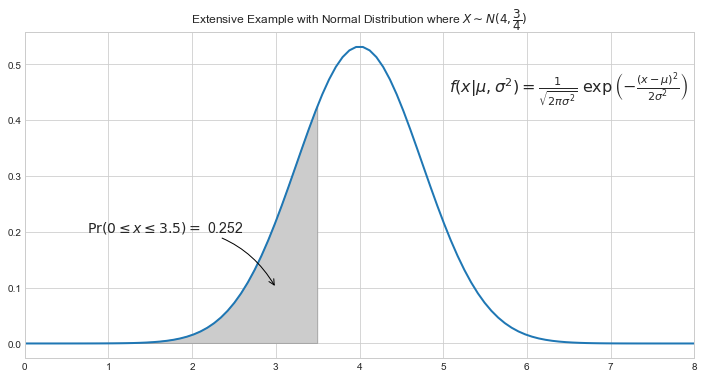

In [11]:
# Import Polygon functions
from matplotlib.patches import Polygon

# Create data for a normal pdf's
mu = 4
sig = 0.75
x = np.linspace(0, 8, 100)
y = sps.norm.pdf(x, loc=mu, scale=sig)

# Draw standard normal
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, linewidth=2)
ax.set_xlim(0, 8)

# Add title
plt.title(r'Extensive Example with Normal Distribution where $X \sim N(4, \dfrac{3}{4})$')

# Calculate polygon coordinates
# and add polygon shape to plot
a, b = 0, 3.5  # Integral limits
ix = np.linspace(a, b)
iy = sps.norm.pdf(ix, loc=mu, scale=sig)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.65')
ax.add_patch(poly)

# Add normal distribution function as text
plt.text(x=6.5, y=0.45, s=r'$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}' +
         r'\; \exp\left(- \frac{(x - \mu)^2}{2\sigma^2}\right)$', size=16,
         horizontalalignment='center');

# Calculate area under curve
pr = sps.norm.cdf(b, loc=mu, scale=sig)

# Add annotation with area under curve
t = '$\Pr(0 \leq x \leq 3.5) = $ {0:1.3f}'.format(pr)
plt.annotate(t, xy=(3, 0.1), xytext=(0.75, 0.2), size=14,
             arrowprops=dict(arrowstyle='->', 
             connectionstyle='angle3, angleA=0,angleB=120'));

## Scatter Plots

Above we discussed the `plt.plot()` method to draw line plots. The same function is capable of drawing simple scatter plots too. It is highly efficient, especially for larger data sets (> 2'000 data points), but its efficiency comes at the cost of flexibility. The additional `plt.scattter()` function is more flexible and therefore provides a powerful alternative for smaller to medium sized scatter plots. 

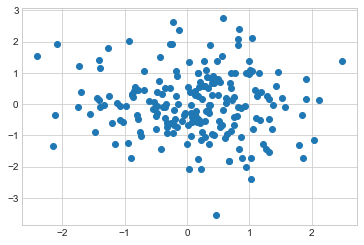

In [12]:
# Generate std. normal rv
rv = np.random.normal(size=(200, 2))

# Draw scatter plot
plt.scatter(rv[:, 0], rv[:, 1]);

The standard marker is a circle. The following figure shows other markers. The complete list [can be found here](https://matplotlib.org/stable/api/markers_api.html).

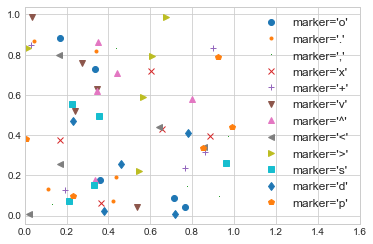

In [13]:
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'p']:
    plt.plot(np.random.rand(5), np.random.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(fontsize=12)
plt.xlim(0, 1.6);

## Histogram

Histograms are often a great first step in understanding the distribution of a given dataset. To plot a histogram Matplotlib offers the `plt.hist()` command. Let's show a simple example:

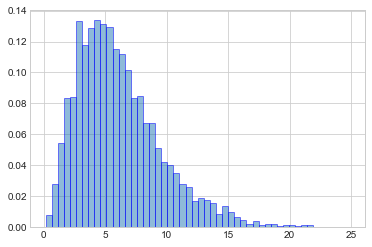

In [14]:
# RV from a gamma distribution
gamma = np.random.gamma(size=5000, shape=3, scale=2)

plt.hist(gamma, bins=50, density=True, 
         alpha=0.5, edgecolor='blue');

As shown in the above example, the figure can again be adjusted to the user's liking. Available arguments are listed [here](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html). `alpha=0.5` adjusts the density of the bar color. With `density=True` the counts will be normalized to form a probability density. These two arguments are helpful if one wishes to combine two histograms as shown in below example where the histogram displays a standard normal pdf combined with its cdf.

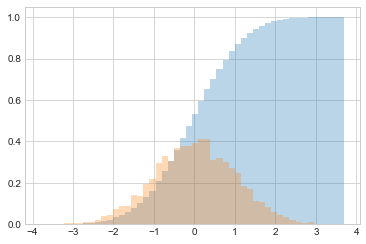

In [15]:
# RV from a normal distribution
norm = np.random.normal(size=5000)

plt.hist(norm, bins=50, histtype='stepfilled', alpha=0.3, density=True, cumulative=True)
plt.hist(norm, bins=50, histtype='stepfilled', alpha=0.3, density=True);

Below is an example one could use if one wishes to add a Kernel Density Estimation (KDE) to a histogram. Further information regarding the problem of bin-size when using histograms, and KDE estimation you can find [here](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28) or [here](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/). 

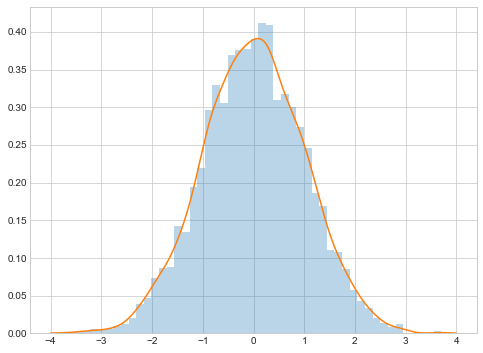

In [16]:
kde = sps.gaussian_kde(norm)
xx = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(norm, bins=50, histtype='stepfilled', alpha=0.3, density=True)
ax.plot(xx, kde(xx));

## Bar Charts

Python offers the `plt.bar()` functionality to plot bar charts. It is shown below in two simple example. Before we explain the code we have to keep in mind two things: First, using bar charts feels awkardly 'old-fashioned'. It is hardly used anymore today and there are better ways to represent your results. Second, Matplotlib's bar charts options are limited and coding it is cumbersome. Simply put, other tools such as R (e.g. its barplot-function or the excellent ggplot2 package) provide much more (and better) functionalities than Matplotlib (see e.g. [here](http://www.r-graph-gallery.com/portfolio/barplot/)). 

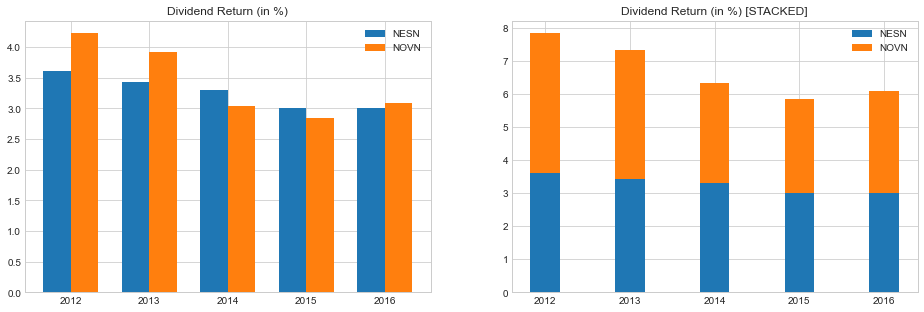

In [17]:
# Dividend return data for Nestle, Novartis 2012-2016
NESN = (3.61, 3.43, 3.30, 3.01, 3.01)
NOVN = (4.22, 3.91, 3.04, 2.84, 3.09)

ind = np.arange(len(NESN))  # the x locations for the groups
width = 0.35  # the width of the bars

# Setup figure, axes: two plots arranged horizontally
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot left [0] bar chart
rects1 = ax[0].bar(ind, NESN, width)
rects2 = ax[0].bar(ind + width, NOVN, width)

# Add text for title, legend and axes ticks
ax[0].set_title('Dividend Return (in %)')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('2012', '2013', '2014', '2015', '2016'))
ax[0].legend((rects1[0], rects2[0]), ('NESN', 'NOVN'))

# Plot right [1] bar chart
rects3 = ax[1].bar(ind, NESN, width, align='center')
rects4 = ax[1].bar(ind, NOVN, width, bottom=NESN)  # bottom used to stack bars

# Add text for title, legend and axes ticks
ax[1].set_title('Dividend Return (in %) [STACKED]')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(('2012', '2013', '2014', '2015', '2016'))
ax[1].legend((rects3[1], rects4[1]), ('NESN', 'NOVN'));

There are other options such as the plotting functionalities provided through [Plotly](https://plot.ly/python/bar-charts/), [Bokeh](http://bokeh.pydata.org/en/latest/docs/gallery.html) or [Altair](https://altair-viz.github.io/), which are much more accessible in plotting barplots than Matplotlib.

## Pie Chart

What is written above about matplotlib's bar chart functionalities is true for pie charts as well, although to a lesser extent. Compared to bar charts, the coding of pie charts is less cumbersome and the available options are ok. Nevertheless, pie chart feel awkwardly old fashioned and personally I do not encourage students to use them. [Waffle charts](http://jonathansoma.com/lede/foundations-2018/matplotlib/creating-waffle-charts-in-pandas/), as an equivalent comparable, provide a much better overview. And here again R (combined with the 'ggplo2' and 'waffle' package) simply outdo Matplotlib. Still, for reference I provide below an example of a pie chart code [(based on matplotlib's example)](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html).

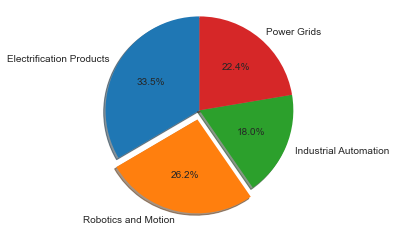

In [18]:
# Pie chart with slices ordered/plotted counter-clockwise:
labels = ['Electrification Products', 'Robotics and Motion', 
         'Industrial Automation', 'Power Grids']
sizes = [1528, 1195, 824, 1021]
explode = (0, 0.1, 0, 0)  # only "explode" 2nd slice (i.e. 'Robotics')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

## Subplots

Sometimes it is more expressive to plot mutliple figures aligned on columns or rows. Matplotlib's two main routines for doing this are `plt.subplot()` and `plt.subplots()` (note the `s` at the end of the second command). The former serves well for simple plots with a limited number of subplots:

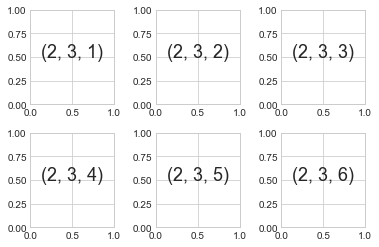

In [19]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

# Adjust amount of height (hspace) and width (wspace)
# reserved for white space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.5)

The `plt.subplots()` function provides better control over elements and axes. Rather than creating subplot by subplot, `plt.subplots()` creates a full grid of subplots in a single line. Accessing them works similar to a NumPy array. Sharing x-axis and y-axis is easily done with the `sharex=` and `sharey=` command, respectively. Below is an example on how to create a 2x3 grid of subplots, where all plots in the same row share a common y-axis scale and all axes in the same column have their x-axis scale in common. We will use the object-oriented approach.

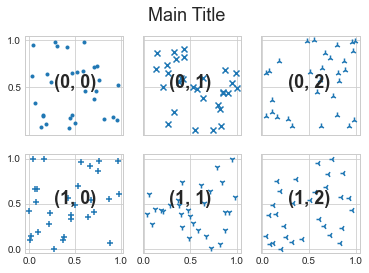

In [20]:
markers = ['.', '+', 'x', '1', '2', '3']

# Draw two rows of 3 plots each with shared axes
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# Add main title above subplots
fig.suptitle('Main Title', fontsize=18)

# Access each plot and add text
for i in range(2):
    for j in range(3):
        # Create some random data
        data = np.random.uniform(size=(30, 2))
        
        # Scatterplot with text label
        ax[i, j].scatter(data[:, 0], data[:, 1], marker=markers[2*j+i])
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, 
                      ha='center', weight='bold');

An alternative approach emerging is the `plt.subplot_mosaic` function. It offers a suprisingly simple way of arranging plots.

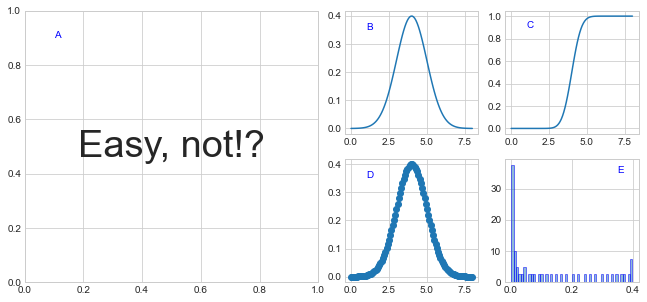

In [21]:
figure_mosaic = """
AABC
AADE
"""

fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(11, 5))
axes["B"].plot(x, y1)
axes["C"].plot(x, y2)
axes["D"].scatter(x, y1)
axes["E"].hist(y1, bins=50, density=True, alpha=0.5, edgecolor='blue')

axes["A"].text(0.1, 0.9, "A", color='blue')
axes["A"].text(0.5, 0.5, "Easy, not!?", ha="center", va="center", size=38)
axes["B"].text(1, 0.35, "B", color='blue')
axes["C"].text(1, 0.9, "C", color='blue')
axes["D"].text(1, 0.35, "D", color='blue')
axes["E"].text(0.35, 35, "E", color='blue');


## Saving Figures

Matplotlib has the ability to save figures in a wide variety of formats. You can save your figure using the `savefig()` command. The file format is inferred from the extension of the given filename and the file will be stored - if not specified otherwise - into your current working directory (use `!cd` (Windows) or `!pwd` to check the path of your current working directory). For example `plt.savefig('myFigure.png)` will save the figure as a png to your currend working directory or `plt.savefig('../myFigure.pdf)` and would save the pdf in the parent folder. Alternatively you could provide the absolute path as in `plt.savefig('C:/Users/Name/ParentFolder/Folder/Graphics.tiff)`.

Here are the supported file formats:

In [22]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

<Figure size 432x288 with 0 Axes>

## Beyond Matplotlib

Matplotlib offers the functionality to cover the majority of plotting tasks. However (and as mentioned in the introduction), it has to be said that for more complex tasks, matplotlib does come short compared to other approaches, namely in R (and its seminal 'ggplot2' package by Hadley Wickham) for static figures or R/Shiny and Java Script ('D3.js') for interactive data visualization. 

Python's community has recognizes these shortcomings and as a consequences several additional plotting packages have surfaces in the past couple of years. Among the most popular is 'Seaborn', a package based on Matplotlib but with additional features to serve a more statistically oriented audience. It provides complex yet easy accessible plotting options for static data visualization. For further inspiration see the [gallery on the package's website](http://seaborn.pydata.org/examples/index.html#) - especially the `distplot()` and `jointplot()` might be of interest.

Another package which is more and more used is 'Bokeh'. It is a Python library focusing on interactive visualization (in the style of D3.js) for modern web browsers. With its extensive documentation and the additional packages to serve not only the Python but also the R and Julia community, Bokeh is well set to become the major source for interactive, java-script-like plotting in Python. We will not make use of the Bokeh package in this course but you might want to have a look at the [gallery](http://bokeh.pydata.org/en/latest/docs/gallery.html) to get some idea of the package's capabilities.

Finally, there are two more packages worth mentioning: [Altair](https://altair-viz.github.io/gallery/index.html), a declarative statistical visualization library similar to ggplot in R and [Plotly](https://plot.ly/python/).

A fantastic set of graph examples that combines the best of matplotlib, seaborn and plotly is [The Python Graph Gallery](https://www.python-graph-gallery.com/). If you are looking for inspiration including corresponding code examples, you do not want to miss this website.

# Examples
## Line Plot: Share Price Chart

Having discussed the basics, below are some real world examples. The first is a line plot displaying (normalized) share price data for Swiss industrial companies: ABB (CH0012221716), Bucher (CH0002432174), Burckard Compression (CH0025536027), OC Oerlikon (CH0000816824), Georg Fisher (CH0001752309) and Schindler (CH0024638212). The data is downloaded from Quandl. For that we use the "pandas_datareader" package. 

**Note that this package is not part of Anaconda's standard distribution.** To install open the Anaconda Navigator, click on environments, then select "All" from the dropdown menu and search for "pandas_datareader". When found flag the package and click "Apply" (bottom right). Alternatively, open a Shell and type in "pip install pandas-datareader". For details see [the package's documentation](https://pandas-datareader.readthedocs.io/en/latest/). 

### Important: please set up your own Quandl account and insert your personal api_key to get the data!

In [23]:
# Load package to download share prices from web
import pandas_datareader.data as web
import pandas as pd

# List with stock isin numbers
isin = ['SIX/CH0012221716CHF', 'SIX/CH0002432174CHF', 'SIX/CH0025536027CHF',
        'SIX/CH0000816824CHF', 'SIX/CH0001752309CHF', 'SIX/CH0024638212CHF']

# Download closing prices of defined shares
data = pd.DataFrame()
for tick in isin:
    data[tick] = web.DataReader(tick, data_source='quandl', 
                                start='2021-01-12', end='2022-01-11',
                                api_key='H494hBc5iXyUgiF4oX5y')['Price']


# Rename column names from ISIN to Ticker
data.columns = ['ABB', 'BUCN', 'BCHN', 'OERL', 'FI-N', 'SCHN']

# Show data extract
data.head()

,ABB,BUCN,BCHN,OERL,FI-N,SCHN
Date,,,,,,
2022-01-11,34.24,454.6,431.0,9.460,1442.0,237.4
2022-01-10,33.80,448.2,425.5,9.495,1410.0,231.4
2022-01-07,35.01,460.4,429.5,9.600,1458.0,239.4
2022-01-06,35.16,458.4,424.5,9.600,1486.0,239.4
2022-01-05,35.79,467.0,427.0,9.775,1485.0,242.8


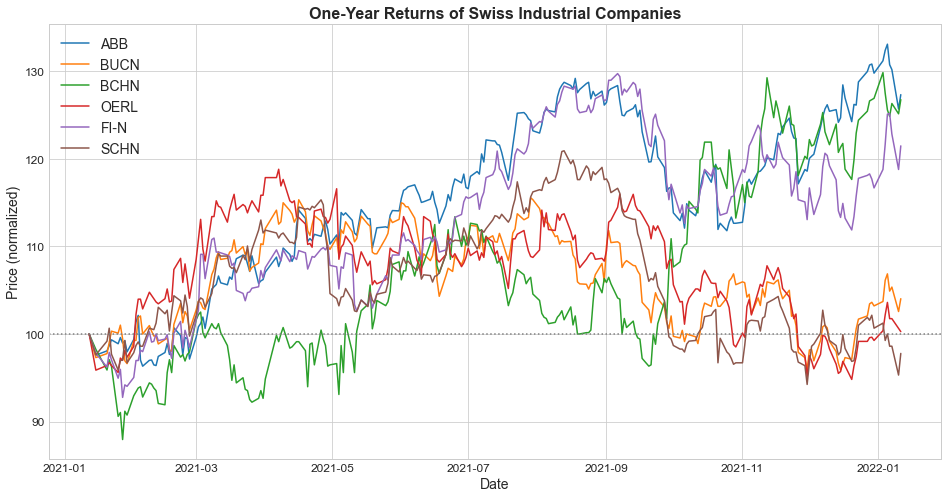

In [24]:
# Plot normalized share prices
plt.figure(figsize = (16, 8))
plt.plot(data / data.iloc[-1] * 100)              # Normalize prices to 100 and plot 
plt.axhline(y=100, color='gray', linestyle=':')   # Add dotted line at 100%
plt.legend(data.columns, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (normalized)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('One-Year Returns of Swiss Industrial Companies', fontsize=16, weight='bold');

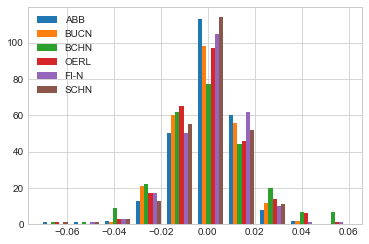

In [25]:
# Calculate the log-returns
rets = np.log(data / data.shift(periods=-1))

# Plot daily returns in histogram
plt.hist(rets)
plt.legend(data.columns, loc='upper left');

## Scatter Plot: Portfolio Simulation and Sharpe Ratios

Using the loaded share data we simulate 5'000 possible portfolio combinations (weights per share) and calculate the corresponding portfolio return and volatility. We know that, given an investment into $n$ assets, a portfolio's (expected) return is given by

$$\mathbb{E}[r_p] = \sum_{i} w_i * \mathbb{E}[r_i] = \mathbf{w^T R} $$
where $w_i \in [0,1]$ with $\sum_i w_i = 1$ is the proportion invested in asset $i$, $\mathbb{E}[r_i]$ asset $i$'s expected return, $\mathbf{w, R}$ are $n \times 1$ vectors with weights and historical returns, respectively. Note that we assume that historical returns are the best estimators for the expected return. 

In the same context, risk is defined as the the portfolio's return variance:

$$\sigma_p^2 = \sum_i \sum_j w_i w_j \sigma_i \sigma_j \rho_{ij} = \mathbf{w^T \Sigma w}$$

where $\sigma$ is the (sample) standard deviation of the periodic returns on an asset, $\rho_{ij}$ is the correlation coefficient between returns on asset $i$ and $j$ and $\mathbf{\Sigma}$ the corresponding matrix notation of the variance-covariance matrix.

Having generated 5000 possible portfolio combinations we use a scatter plot to visualize the resulting portfolios. We apply a color scheme to indicate the Sharpe ratio of each portfolio, where the Sharpe ratio is defined as 

$$SR_p = \frac{\mathbb{E}[r_p] - r_f}{\sigma_p} $$

In [26]:
n = 5000     # Number of simulations
pfrets = []  # Portfolio returns
pfvols = []  # Portfolio volatilities
rf = 0   # Risk-free rate

# Simulate n times 6 random weights and calculate corresponding
# (annual) portfolio return and volatility given the random weights
for p in range(n):
    w = np.random.random(rets.shape[1])
    w = w / np.sum(w)
    pfrets.append(np.sum(rets.mean() * w) * 252 - rf)
    pfvols.append(np.sqrt(np.dot(w.T, np.dot(rets.cov() * 252, w))))

# Convert results to an np.array
pfrets = np.array(pfrets)
pfvols = np.array(pfvols)

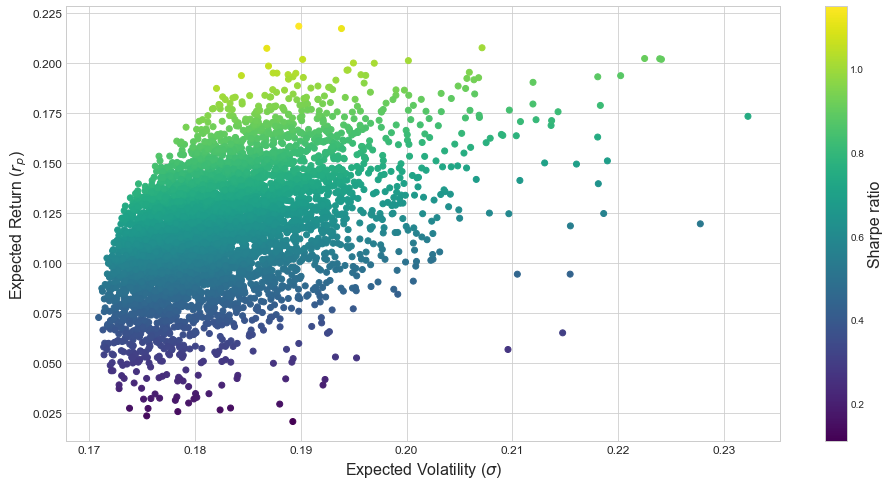

In [27]:
# Scatterplot of the 5000 simulated portfolios
plt.figure(figsize = (16, 8))

# Color (c) of dot based on Sharpe ratio,
# Color map (cmap) set to 'viridis' style 
plt.scatter(pfvols, pfrets, c=((pfrets-rf) / pfvols), 
            marker='o', cmap='viridis')

# Add colorbar, labels and change tick size
plt.colorbar().set_label(label='Sharpe ratio', size=16)
plt.xlabel('Expected Volatility ($\sigma$)', fontsize=16)
plt.ylabel('Expected Return ($r_p$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Histogram: Share Returns

Literature often assumes returns to be normally distributed. In a hypothetical example, we plot the annual returns of the 5'000 simulated portfolios in a histogram and combine it with a kernel density estimate and a normal distribution (given mean, sd of data at hand).

C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


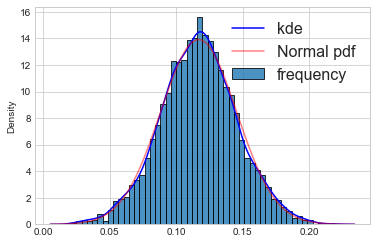

In [28]:
# Import Seaborn package
import seaborn as sns

# Plot histogram with kde and normal fit given data
sns.distplot(pfrets, bins=50, norm_hist=True, fit=sps.norm,
             hist_kws={'label':'frequency', 'alpha':0.8, 'edgecolor':'k'},
             kde_kws={'label':'kde', 'color':'b'},
             fit_kws={'label':'Normal pdf', 'alpha':0.5, 'color':'r'})
plt.legend(fontsize=16);

## Scatter Plot

It is often said that central government debt is positively correlated with GDP growth. We could investigate this (on a superficial scale, of course) by plotting the data against each other in a scatter plot. In below chart we use data downloaded from the world bank for Switzerland, the United Kingdom, and the USA. 

In order to download the data, we need to know the indicators in the World Bank's database. The best way to find these is to go to the [World Bank's data catalogue](http://data.worldbank.org/indicator) and use their search engine. Once you've found what you were looking for, you will find the indicator in the url. For GDP growth it is "NY.GDP.MKTP.KD.ZG"  and "GC.DOD.TOTL.GD.ZS" for central government debt (total, in % of GDP). 

In [29]:
# Import worldbank functions as wb
from pandas_datareader import wb

# Set parameter and download data
ctry = ['US', 'GBR', 'CH']
ind = ['NY.GDP.MKTP.KD.ZG', 'GC.DOD.TOTL.GD.ZS']
df = wb.download(indicator=ind, country=ctry, start=1990, end=2018)

In [30]:
# Drop (multi)index and format columns
df.reset_index(inplace=True)
df.columns = ['Country', 'Year', 'GDP growth', 'Debt']
df.head()

,Country,Year,GDP growth,Debt
0,Switzerland,2018,2.916905,NaN
1,Switzerland,2017,1.584820,NaN
2,Switzerland,2016,2.045186,19.045740
3,Switzerland,2015,1.657769,20.223846
4,Switzerland,2014,2.446845,20.327055


Now that we have the data in a proper format, we use Seaborn's `lmplot()` function to plot debt against gdp growth. The `lmplot()` adds a linear regression to the data, incl. confidence bands (here set to 95%; based on 100 bootstrap resamples).

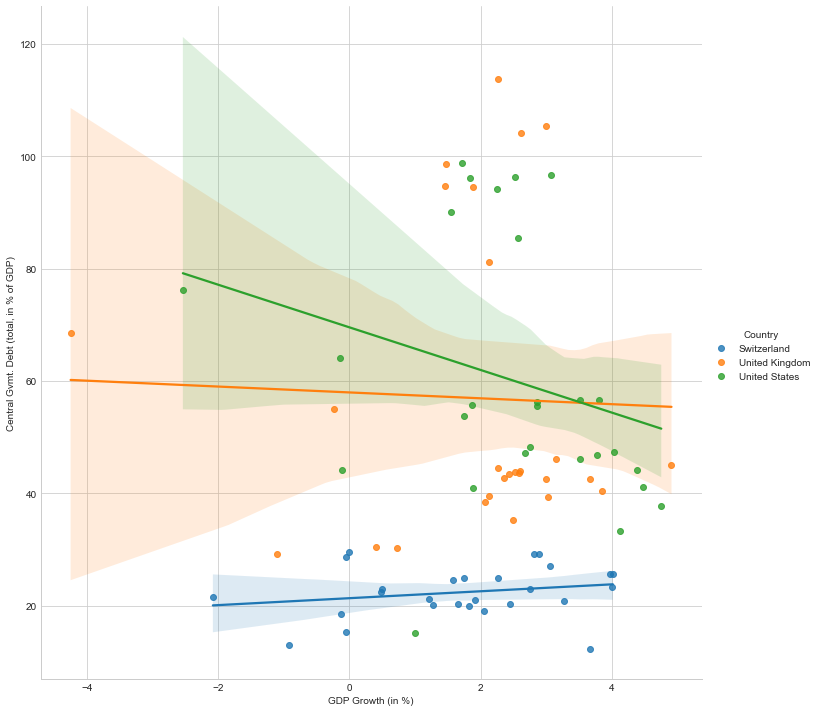

In [31]:
# Draw scatterplot incl. linear regression
# ci=95 and n_boot=100 are default values, thus
# these are just shown for better understanding
fig = sns.lmplot(x='GDP growth', y='Debt', hue='Country', data=df,
                 truncate=True, height=10, ci=95, n_boot=100)

# Add more informative axis labels
fig.set_axis_labels('GDP Growth (in %)', 'Central Gvmt. Debt (total, in % of GDP)');

## Further Resources

In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources are recommended as further reading on the discussed topic:

* Vanderplas, Jake, 2016, *Python Data Science Handbook* (O'Reilly Media, Sebastopol, CA).
* Hilpisch, Yves, 2019, *Python for Finance* (O'Rilly Media, Sebastopol, CA).
* McKinney, Wes, 2013, *Python for Data Analysis* (O'Rilly Media, Sebastopol, CA).
* Sheppard, Kevin, 2017, Introduction to Python for Econometrics, Statistics and Data Analysis from Website https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf, 07/07/2017.